# Data mining assignment

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
import numpy as np
import collections
import random

# Visualization
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns


/opt/conda/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


## Exceptions

In [3]:
class UnknownClassifier(Exception):
    def __init__(self):
        super().__init__('Unknown classifier name')

In [4]:
class UnknownMetric(Exception):
    def __init__(self):
        super().__init__('Unknown metric')

## Dataset split

In [5]:
# Split the dataset into train and test set based on the given ratio
# It returns two list of random indexes, one for each set
def split_dataset(N, ratio):
    indexes = [i for i in range(N)]
    limit = int(N * ratio)
    # 3N random exchanges
    for i in range(3*N):
        a = random.randrange(N)
        b = random.randrange(N)
        indexes[a], indexes[b] = indexes[b], indexes[a]
    return indexes[limit:], indexes[:limit]

## Classifiers creation

The implemented classifiers, which have been taken from this [list](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html), are:
- Decision Tree ([link](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
- SVC ([link](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC))
- Gaussian process classifier ([link](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessClassifier.html))
- MLP ([link](earn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html))

In [6]:
# Decision tree
def create_dt(parameters):
    criterion = 'gini'
    if 'criterion' in parameters:
        criterion = parameters['criterion']
    splitter = 'best'
    if 'splitter' in parameters:
        splitter = parameters['splitter']
    max_depth = None
    if 'max_depth' in parameters:
            max_depth = parameters['max_depth']
    min_samples_split = 2
    if 'min_samples_split' in parameters:
            min_samples_split = parameters['min_samples_split']
    min_samples_leaf = 1
    if 'min_samples_leaf' in parameters:
            min_samples_leaf = parameters['min_samples_leaf']
    min_weight_fraction_leaf = 0.0
    if 'min_weight_fraction_leaf' in parameters:
            min_weight_fraction_leaf = parameters['min_weight_fraction_leaf']
    max_features = None
    if 'max_features' in parameters:
            max_features = parameters['max_features']
    random_state = None
    if 'random_state' in parameters:
            random_state = parameters['random_state']
    max_leaf_nodes = None
    if 'max_leaf_nodes' in parameters:
            max_leaf_nodes = parameters['max_leaf_nodes']
    min_impurity_decrease = 0.0
    if 'min_impurity_decrease' in parameters:
            min_impurity_decrease = parameters['min_impurity_decrease']
    class_weight = None
    if 'class_weight' in parameters:
            class_weight = parameters['class_weight']
    ccp_alpha = 0.0
    if 'ccp_alpha' in parameters:
            ccp_alpha = parameters['ccp_alpha']

    return DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        min_weight_fraction_leaf=min_weight_fraction_leaf,
        max_features=max_features,
        random_state=random_state,
        max_leaf_nodes=max_leaf_nodes,
        min_impurity_decrease=min_impurity_decrease,
        class_weight=class_weight,
        ccp_alpha=ccp_alpha,
    )

In [7]:
# SVC 
def create_svc(parameters):
    C = 1.0
    if 'C' in parameters:
        C = parameters['C']
    kernel = 'rbf'
    if 'kernel' in parameters:
        kernel = parameters['kernel']
    degree = 3
    if 'degree' in parameters:
        degree = parameters['degree']
    gamma = 'scale'
    if 'gamma' in parameters:
        gamma = parameters['gamma']
    coef0 = 0.0
    if 'coef0' in parameters:
        coef0 = parameters['coef0']
    shrinking = True
    if 'shrinking' in parameters:
        shrinking = parameters['shrinking']
    probability = False
    if 'probability' in parameters:
        probability = parameters['probability']
    tol = 1e-3
    if 'tol' in parameters:
        tol = parameters['tol']
    cache_size = 200
    if 'cache_size' in parameters:
        cache_size = parameters['cache_size']
    class_weight = None
    if 'class_weight' in parameters:
        class_weight = parameters['class_weight']
    verbose = False
    if 'verbose' in parameters:
        verbose = parameters['verbose']
    max_iter = -1
    if 'max_iter' in parameters:
        max_iter = parameters['max_iter']
    decision_function_shape = 'ovr'
    if 'decision_function_shape' in parameters:
        decision_function_shape = parameters['decision_function_shape']
    break_ties = False
    if 'break_ties' in parameters:
        break_ties = parameters['break_ties']
    random_state = None
    if 'random_state' in parameters:
        random_state = parameters['random_state']

    return SVC(
        C=C,
        kernel=kernel,
        degree=degree,
        gamma=gamma,
        coef0=coef0,
        shrinking=shrinking,
        probability=probability,
        tol=tol, cache_size=cache_size,
        class_weight=class_weight,
        verbose=verbose,
        max_iter=max_iter,
        decision_function_shape=decision_function_shape,
        break_ties=break_ties,
        random_state=random_state
    )

In [8]:
# Gaussian process
def create_gp(parameters):
    kernel = None
    if 'kernel' in parameters:
            kernel = parameters['kernel']
    optimizer = 'fmin_l_bfgs_b'
    if 'optimizer' in parameters:
            optimizer = parameters['optimizer']
    n_restarts_optimizer = 0
    if 'n_restarts_optimizer' in parameters:
            n_restarts_optimizer = parameters['n_restarts_optimizer']
    max_iter_predict = 100
    if 'max_iter_predict' in parameters:
            max_iter_predict = parameters['max_iter_predict']
    warm_start = False
    if 'warm_start' in parameters:
            warm_start = parameters['warm_start']
    copy_X_train = True
    if 'copy_X_train' in parameters:
            copy_X_train = parameters['copy_X_train']
    random_state = None
    if 'random_state' in parameters:
            random_state = parameters['random_state']
    multi_class = 'one_vs_rest'
    if 'multi_class' in parameters:
            multi_class = parameters['multi_class']
    n_jobs = None
    if 'n_jobs' in parameters:
            n_jobs = parameters['n_jobs']

    return GaussianProcessClassifier(
        kernel=kernel,
        optimizer=optimizer,
        n_restarts_optimizer=n_restarts_optimizer,
        max_iter_predict=max_iter_predict,
        warm_start=warm_start,
        copy_X_train=copy_X_train,
        random_state=random_state,
        multi_class=multi_class,
        n_jobs=n_jobs
    )

In [9]:
# MLP
def create_mlp(parameters):
    hidden_layer_sizes = (100,)
    if 'hidden_layer_sizes' in parameters:
            hidden_layer_sizes = parameters['hidden_layer_sizes']
    activation = 'relu'
    if 'activation' in parameters:
            activation = parameters['activation']
    solver = 'adam'
    if 'solver' in parameters:
            solver = parameters['solver']
    alpha = 0.0001
    if 'alpha' in parameters:
            alpha = parameters['alpha']
    batch_size = 'auto'
    if 'batch_size' in parameters:
            batch_size = parameters['batch_size']
    learning_rate = 'constant'
    if 'learning_rate' in parameters:
            learning_rate = parameters['learning_rate']
    learning_rate_init = 0.001
    if 'learning_rate_init' in parameters:
            learning_rate_init = parameters['learning_rate_init']
    power_t = 0.5
    if 'power_t' in parameters:
            power_t = parameters['power_t']
    max_iter = 200
    if 'max_iter' in parameters:
            max_iter = parameters['max_iter']
    shuffle = True
    if 'shuffle' in parameters:
            shuffle = parameters['shuffle']
    random_state = None
    if 'random_state' in parameters:
            random_state = parameters['random_state']
    tol = 1e-4
    if 'tol' in parameters:
            tol = parameters['tol']
    verbose = False
    if 'verbose' in parameters:
            verbose = parameters['verbose']
    warm_start = False
    if 'warm_start' in parameters:
            warm_start = parameters['warm_start']
    momentum = 0.9
    if 'momentum' in parameters:
            momentum = parameters['momentum']
    nesterovs_momentum = True
    if 'nesterovs_momentum' in parameters:
            nesterovs_momentum = parameters['nesterovs_momentum']
    early_stopping = False
    if 'early_stopping' in parameters:
            early_stopping = parameters['early_stopping']
    validation_fraction = 0.1
    if 'validation_fraction' in parameters:
            validation_fraction = parameters['validation_fraction']
    beta_1 = 0.9
    if 'beta_1' in parameters:
            beta_1 = parameters['beta_1']
    beta_2 = 0.999
    if 'beta_2' in parameters:
            beta_2 = parameters['beta_2']
    epsilon = 1e-8
    if 'epsilon' in parameters:
            epsilon = parameters['epsilon']
    n_iter_no_change = 10
    if 'n_iter_no_change' in parameters:
            n_iter_no_change = parameters['n_iter_no_change']
    max_fun = 15000
    if 'max_fun' in parameters:
            max_fun = parameters['max_fun']
            
    return MLPClassifier(
        hidden_layer_sizes=hidden_layer_sizes,
        activation=activation,
        solver=solver,
        alpha=alpha,
        batch_size=batch_size,
        learning_rate=learning_rate,
        learning_rate_init=learning_rate_init,
        power_t=power_t,
        max_iter=max_iter,
        shuffle=shuffle,
        random_state=random_state,
        tol=tol,
        verbose=verbose,
        warm_start=warm_start,
        momentum=momentum,
        nesterovs_momentum=nesterovs_momentum,
        early_stopping=early_stopping,
        validation_fraction=validation_fraction,
        beta_1=beta_1,
        beta_2=beta_2,
        epsilon=epsilon,
        n_iter_no_change=n_iter_no_change,
        max_fun=max_fun
    )

In [10]:
def create_classifier(name, parameters):
    if name == 'DecisionTree':
        return create_dt(parameters)
    elif name == 'SVC':
        return create_svc(parameters)
    elif name == 'GaussianProcess':
        return create_gp(parameters)
    elif name == 'MLP':
        return create_mlp(parameters)
    else:
        raise UnknownClassifier()

## 1-Fold and Confusion matrix

In [11]:
def create_cm_1_fold(classifier, FEATURES, LABELS):
    assert(len(FEATURES) == len(LABELS))
    N = len(FEATURES)
    true_positive, true_negative, false_positive, false_negative = 0, 0, 0, 0
    predictions = []
    
    for i in range(N):
        # Create array [0..N] excluding value i
        if i == 0:
            indexes = np.array(range(1,N))
        elif i < N - 1:
            indexes = np.append(np.array(range(0,i)), np.array(range(i + 1,N)))
        else:
            indexes = np.array(range(0,N - 1))
            
        # Train the classifier with indexes values
        model = classifier.fit(FEATURES[indexes], LABELS[indexes])
        
        # Predict and check if true/false positive/negative
        prediction = model.predict([FEATURES[i]])[0]
        predictions.append(prediction)
        if prediction == 0:
            if prediction == LABELS[i]:
                true_negative += 1
            else:
                false_negative += 1
        else:
            if prediction == LABELS[i]:
                true_positive += 1
            else:
                false_positive += 1
    
    # Calculate confusion matrix
    cm = confusion_matrix(LABELS, predictions, normalize='true')
    print(cm)
    return cm

## Metrics

In [12]:
# Calculate score for given metrix from the confusion matrix
def calculate_score(metric, cm):
    TP = cm[1][1]
    FP = cm[0][1]
    FN = cm[1][0]
    TN = cm[0][0]
    P = TP + FN
    N = TN + FP
    
    if metric == 'Accuracy':
        return (TP + TN) / (P + N)
    if metric == 'TPR':
        return TP / P
    if metric == 'FPR':
        return FP / N
    if metric == 'FNR':
        return FN / P
    if metric == 'TNR':
        return TN / N
    if metric == 'Precision':
        return TP / (TP + FP)
    if metric == 'F1':
        return 2*TP / (2*TP + FP + FN)
    if metric == 'ER':
        return 1 - calculate_score('Accuracy', cm)
    raise UnknownMetric()

### Global variables

In [13]:
FEATURES = None
LABELS = None
DS_TEST = None

## Main functions

In [15]:
# Train each classifier on the train set and return the ensemble model
def train(
        dataset, 
        class_attribute, 
        test_set_ratio, 
        positive_values,
        target_metrics,
        select_threshold,
        max_number,
        classifier_list
    ):
    
    # Extract feature names
    global DS_TEST, FEATURES, LABELS
    ds_train, DS_TEST = split_dataset(len(dataset), test_set_ratio)
    feature_names = []
    for col_name in dataset.columns:
        if col_name != class_attribute:
            feature_names.append(col_name)
    
    # Extract features and labels
    oh_encoder = preprocessing.OneHotEncoder().fit(dataset[feature_names])
    FEATURES = oh_encoder.transform(dataset[feature_names]).toarray()
    LABELS = np.array([1 if x in positive_values else 0 for x in dataset[class_attribute]])
    
    # Create classifiers
    classifiers = []
    for classifier_spec in classifier_list:
        classifiers.append(create_classifier(classifier_spec[0], classifier_spec[1]))
    
    # Compute confusion matrix for each classifier with 1-fold
    confusion_matrixes = []
    for classifier in classifiers:
        print('Classifier:', classifiers.index(classifier))
        confusion_matrixes.append(create_cm_1_fold(classifier, FEATURES[ds_train], LABELS[ds_train]))
    
    # Calculate score for each classifier, we take those with a score > select_threshold
    classifier_scores = []
    for i in range(len(classifiers)):
        cm = confusion_matrixes[i]
        score = calculate_score(target_metrics, cm)
        if score > select_threshold:
            classifier_scores.append({
                'index': i,
                'score': score
            })
    
    # Sort classifiers by score
    classifier_scores = sorted(classifier_scores, 
                               key=lambda x: x['score'],
                               reverse=True)
    
    # Take the first max_number classifiers
    if max_number == 0: #take all the classifiers
        selected_classifiers = [x['index'] for x in classifier_scores]
    else:
        selected_classifiers = [x['index'] for x in classifier_scores[:max_number]]
    # Note: selected_classifier is a list with the indexes of the selected classifiers
    
    # Create ensemble model
    ensemble_model = []
    for i in selected_classifiers:
        model = classifiers[i].fit(FEATURES, LABELS)
        ensemble_model.append([model, confusion_matrixes[i]])
    
    return ensemble_model

In [16]:
# Given the ensemble model predict the classification of a given instance
def predict(instance, ensemble_model):
    weights = [0.0, 0.0]
    for c in ensemble_model:
        model = c[0]
        confusion_matrix = c[1]
        prediction = model.predict([instance])
        for j in range(0, 2):
            weights[j] += confusion_matrix[j][prediction]
    
    if weights[0] > weights[1]:
        return 0
    
    return 1

In [17]:
# Test the ensemble model on the test set
def validation(features, labels, ensemble_model):
    predictions = []
    for f in features:
        predictions.append(predict(f, ensemble_model))
        
    return confusion_matrix(labels, predictions, normalize='true')

In [28]:
# Plot the confusion matrix
def plot_confusion_matrix(cm, labels, title):
    cm_df = pd.DataFrame(cm,
                     index = labels, #true label
                     columns = labels) #predicted label
    title = "Ensemble model: " + title
    plt.figure(figsize=(5.5,4))
    sns.heatmap(cm_df, annot=True)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

## Datasets

### Nursery dataset
- Number of instances: 12960
- Number of attributes: 8

[Nursery dataset](https://archive.ics.uci.edu/ml/datasets/nursery) was derived from a hierarchical decision model originally developed to rank applications for nursery schools. It was used during several years in 1980's when there was excessive enrollment to these schools in Ljubljana, Slovenia, and the rejected applications frequently needed an objective explanation. The final decision depended on three subproblems: occupation of parents and child's nursery, family structure and financial standing, and social and health picture of the family.

In [37]:
nursery_header = [
    'parents',
    'has_nurs',
    'form',
    'children',
    'housing',
    'finance',
    'social',
    'health',
    'classification'
]
ds_nursery = pd.read_csv("/datasets/Nursery/nursery.csv", names=nursery_header)

### Balance scale dataset
- Number of instances: 625
- Number of attributes: 4

[Balance scale dataset](https://archive.ics.uci.edu/ml/datasets/Balance+Scale) was generated to model psychological
experimental results.  Each example is classified as having the balance scale tip to the right, tip to the left, or be balanced.  The attributes are the left weight, the left distance, the right weight, and the right distance.  The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.

In [18]:
balance_scale_header = [
    'classification',
    'left_weight',
    'left_distance',
    'right_weight',
    'right_distance'
]

ds_balance_scale = pd.read_csv("/datasets/Balance_scale/balance_scale.csv", names=balance_scale_header)

### Monk's problem dataset
- Number of instances: 432 (3 datasets)
- Number of attributes: 6

[Monk's problem dataset](https://archive.ics.uci.edu/ml/datasets/MONK%27s+Problems). The MONK's problem were the basis of a first international comparison of learning algorithms. The result of this comparison is summarized in
"The MONK's Problems - A Performance Comparison of Different Learning algorithms", published as Technical Report CS-CMU-91-197, Carnegie Mellon University in Dec. 1991. There are three MONK's problems.  The domains for all MONK's problems are the same. One of the MONK's problems has noise added. For each problem, the domain was partitioned into a train and test set but for our testing the two parts were united.

In [19]:
monks_header = [
    'classification',
    'a1',
    'a2',
    'a3',
    'a4',
    'a5',
    'a6'
]

ds_monks1 = pd.read_csv("/datasets/Monks/monks1.csv", names=monks_header)
ds_monks2 = pd.read_csv("/datasets/Monks/monks2.csv", names=monks_header)
ds_monks3 = pd.read_csv("/datasets/Monks/monks3.csv", names=monks_header)

### Training and testing

Classifier: 0
[[1. 0.]
 [0. 1.]]
Classifier: 1
[[1. 0.]
 [0. 1.]]
Classifier: 2
[[0.99292763 0.00707237]
 [0.01136364 0.98863636]]
Classifier: 3
[[9.99835526e-01 1.64473684e-04]
 [3.34224599e-04 9.99665775e-01]]
Classifier: 4
[[1. 0.]
 [0. 1.]]


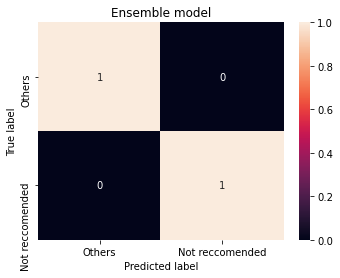

In [46]:
# Nursery dataset
ensemble_model_nursery = train(
    ds_nursery, 
    'classification', 
    0.3, 
    ['not_recom'],
    'Accuracy', 
    0.6, 
    3, 
    [
        ['DecisionTree', {}],
        ['DecisionTree', {'max_depth': 5, 'criterion': 'entropy'}],
        ['DecisionTree', {'min_samples_split': 2, 'max_features': 4, 'criterion': 'entropy'}],
        ['DecisionTree', {'min_samples_split': 25, 'max_features': 10, 'criterion': 'gini'}],
        ['DecisionTree', {'min_samples_split': 25, 'max_depth' : 3, 'criterion': 'gini'}],
        # The other classifiers take too much time to compute since the dataset is so big 
    ])

cm = validation(FEATURES[DS_TEST], LABELS[DS_TEST], ensemble_model_nursery)
plot_confusion_matrix(cm, ['Others','Not reccomended'], 'Nursery dataset')

Classifier: 0
[[0.98908297 0.01091703]
 [1.         0.        ]]
Classifier: 1
[[0.93668122 0.06331878]
 [1.         0.        ]]


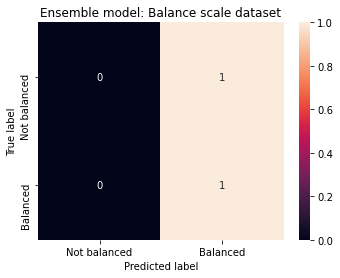

In [29]:
# Balance scale dataset
ensemble_model_balance_scale = train(
    ds_balance_scale, 
    'classification', 
    0.2, 
    ['B'],
    'Accuracy', 
    0.6, 
    3, 
    [
        ['DecisionTree', {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split':2}],
        ['DecisionTree', {'min_samples_split': 2, 'max_depth': 10, 'criterion': 'gini'}],
        ['SVC', {'kernel': 'rbf', 'degree': 9}],
        ['GaussianProcess', {}],
        ['MLP', {}]
    ])

cm = validation(FEATURES[DS_TEST], LABELS[DS_TEST], ensemble_model_balance_scale)
plot_confusion_matrix(cm, ['Not balanced','Balanced'], 'Balance scale dataset')

Classifier: 0
[[0.67630058 0.32369942]
 [0.26589595 0.73410405]]
Classifier: 1
[[0.63583815 0.36416185]
 [0.22543353 0.77456647]]
Classifier: 2
[[1. 0.]
 [0. 1.]]
Classifier: 3
[[0.97687861 0.02312139]
 [0.         1.        ]]
Classifier: 4


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[1. 0.]
 [0. 1.]]


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


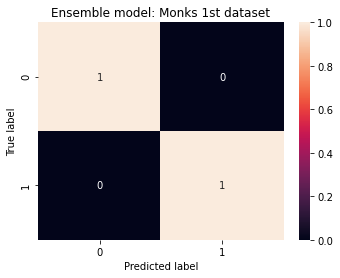

Classifier: 0
[[0.48695652 0.51304348]
 [0.28571429 0.71428571]]
Classifier: 1
[[0.         1.        ]
 [0.15584416 0.84415584]]
Classifier: 2
[[0. 1.]
 [0. 1.]]
Classifier: 3
[[0.00869565 0.99130435]
 [0.01731602 0.98268398]]
Classifier: 4


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[1. 0.]
 [0. 1.]]


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


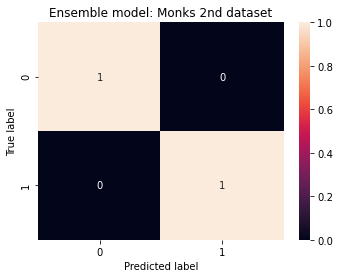

Classifier: 0
[[1. 0.]
 [0. 1.]]
Classifier: 1
[[0.94505495 0.05494505]
 [0.         1.        ]]
Classifier: 2
[[0.98901099 0.01098901]
 [0.         1.        ]]
Classifier: 3
[[0.96153846 0.03846154]
 [0.         1.        ]]
Classifier: 4


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[1. 0.]
 [0. 1.]]


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


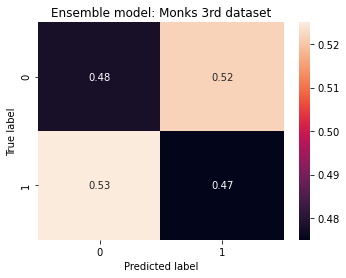

In [30]:
# Monks 1st dataset
ensemble_model_monks1 = train(
    ds_monks1, 
    'classification', 
    0.2, 
    [0],
    'Accuracy', 
    0.6, 
    3, 
    [
        ['DecisionTree', {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split':2}],
        ['DecisionTree', {'min_samples_split': 85, 'max_depth': 6, 'criterion': 'gini'}],
        ['SVC', {'kernel': 'rbf', 'degree': 9}],
        ['GaussianProcess', {}],
        ['MLP', {}]
    ])

cm = validation(FEATURES[DS_TEST], LABELS[DS_TEST], ensemble_model_monks1)
plot_confusion_matrix(cm, ['0','1'], 'Monks 1st dataset')

# Monks 2nd dataset
ensemble_model_monks2 = train(
    ds_monks2, 
    'classification', 
    0.2, 
    [0],
    'Accuracy', 
    0.6, 
    3, 
    [
        ['DecisionTree', {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split':2}],
        ['DecisionTree', {'min_samples_split': 85, 'max_depth': 6, 'criterion': 'gini'}],
        ['SVC', {'kernel': 'rbf', 'degree': 9}],
        ['GaussianProcess', {}],
        ['MLP', {}]
    ])

cm = validation(FEATURES[DS_TEST], LABELS[DS_TEST], ensemble_model_monks2)
plot_confusion_matrix(cm, ['0','1'], 'Monks 2nd dataset')
                      
# Monks 3rd dataset
ensemble_model_monks3 = train(
    ds_monks3, 
    'classification', 
    0.2, 
    [0],
    'Accuracy', 
    0.6, 
    3, 
    [
        ['DecisionTree', {'max_depth': 5, 'criterion': 'entropy', 'min_samples_split':2}],
        ['DecisionTree', {'min_samples_split': 85, 'max_depth': 6, 'criterion': 'gini'}],
        ['SVC', {'kernel': 'rbf', 'degree': 9}],
        ['GaussianProcess', {}],
        ['MLP', {}]
    ])

cm = validation(FEATURES[DS_TEST], LABELS[DS_TEST], ensemble_model_monks1)
plot_confusion_matrix(cm, ['0','1'], 'Monks 3rd dataset')